<a href="https://colab.research.google.com/github/gabrielxbox/projeto-com-python/blob/master/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aprendizado nao supervisionado filme  utilizando pandas



In [35]:
pip install seaborn

In [5]:
import pandas as pd 

In [6]:
url_filmes ='/content/movies.csv';
filmes = pd.read_csv(url_filmes) 

#fazendo a mudança das coluna pa pr

filmes.columns = ['filme_id','titulo','generos']

filmes.head(5)


,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# pegando coluna expesificas e retornando um nam
generos = filmes.generos.str.get_dummies()

#mandando o data frame concatenar os filmes e gereros
#para manda o panda concatenar um do lado do outro 
dados_dos_filmes = pd.concat([filmes,generos], axis=1)

In [9]:
#importando sklearn para prepocessamento
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
# ele vai aprender os gereros e vai transfroma eles
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [11]:
#importanod o KMeans
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)

#mandando o modelo agrupar
modelo.fit(generos_escalados)

print(f'Grupo {modelo.labels_}')

Grupo [2 2 1 ... 1 2 1]


In [12]:
print(generos.columns)
print(modelo.cluster_centers_)

# para trasforma linha em coluna 


Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02  5.47364436e-01  1.05467362e-01 -2.35302765e-01
  -2.67640047e-01 -5.96350788e-01  4.44844050e-01 -2.15783659e-01
  -1.90714622e-01  3.45200112e-04  1.95003737e-01  6.80836696e-01
   1.21191845e-01 -1.76738311e-01  4.41067077e-01 -3.45968300e-01
   5.11130298e-01  1.15481555e+00 -1.47269115e-01 -6.11103430e-02]
 [ 3.76021657e-02 -2.56594542e-01 -1.95546499e-01 -2.52447789e-01
  -2.69785120e-01  2.47393158e-01 -1.60019080e-01  1.34956499e-01
   1.86133941e-01 -1.43796673e-01 -7.70819361e-02 -2.78195336e-01
  -1.05804411e-01  2.28492440e-02 -1.87200065e-01  2.08220842e-01
  -2.62440884e-01 -4.71322467e-01  9.80902333e-02  4.25275983e-02]
 [-5.91799474e-02 -1.73348396e-02  9.01388912e-01  2.253733

In [36]:
#TSNE 
#augoritmo para redução de dados 
from sklearn.manifold import TSNE

tsne = TSNE()
# comverteu para 2 dimenção
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao


array([[ 33.101376 , -62.283764 ],
       [ 14.717352 , -64.53445  ],
       [-47.376225 ,  -2.6877801],
       ...,
       [ 16.964731 ,  -6.864022 ],
       [ 47.568626 ,  -6.524125 ],
       [ -4.714989 ,  26.022034 ]], dtype=float32)

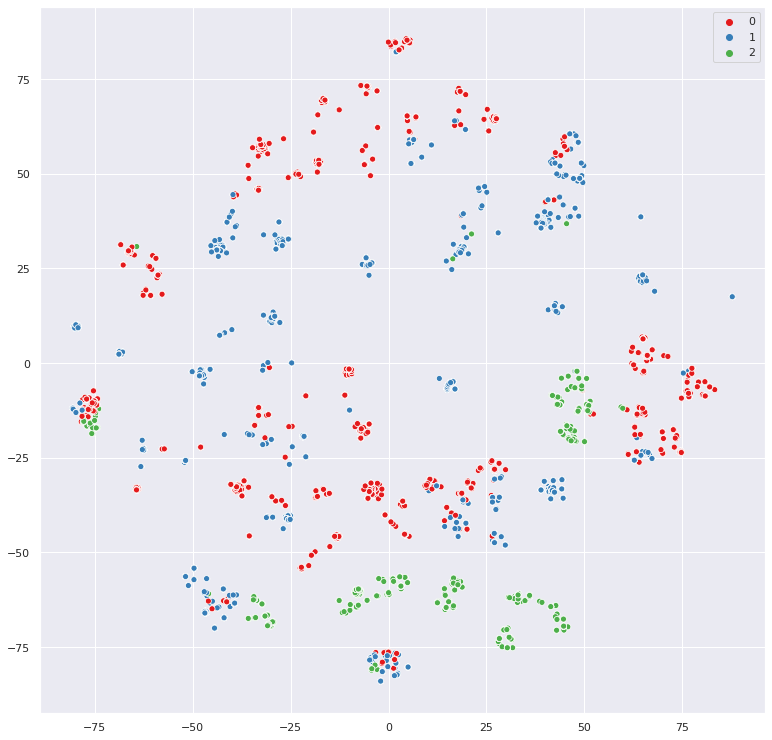

In [44]:
#bibioteca de grafico seaborn
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))